In [1]:
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import growth_simulations as g
import weakref
import scipy.optimize

/home/felix/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
%load_ext autoreload 

In [3]:
%autoreload 2

In [61]:
td = [np.log(2), np.log(2)]
td_std = [0.001, 0.001]
# td = [1.0, 1.0]
# td_std = [0.1, 0.1]

# this script uses a simple adder model

par1 = {'nstep': 1000, 'dt':0.01, 'td': td, 'td_std': td_std, 'v_init':1.0, 'modeltype':1, 'delta':1.0, 
        'lambda_std':None, 'alpha':0.5}
# par1['lambda'] = scipy.optimize.fsolve(g.fn_1, x0=np.log(2.0) / np.mean(td), args=(par1['td'][0], par1['td'][1]))[0]
# temp = 0.5/(np.exp(par1['lambda']*par1['td'][1])-1)
# par1['r'] = temp/(1-temp)
par1['r']=0.5
par1['lambda']=1.0

In [62]:
init_pop = g.starting_popn(par1)
c,obs = g.discr_time_1(par1, init_pop)

In [63]:
temp1 = scipy.stats.linregress(obs[1][400:], np.log(obs[7][400:]))
print temp1[0], (1.0-(1.0-np.log(2)/2)*par1['lambda_std']**2)

1.0

TypeError: unsupported operand type(s) for ** or pow(): 'NoneType' and 'int'

celltype 0
1.44296833361 0.999997792938 0.666666666667


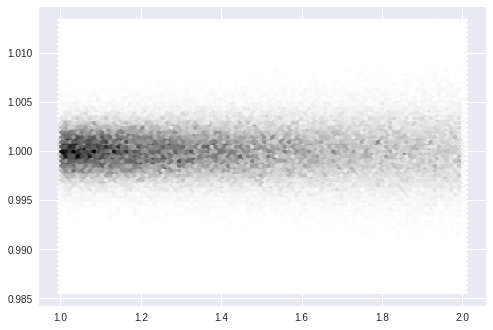

celltype 1
0.721484166804 1.00000455294 0.333333333333


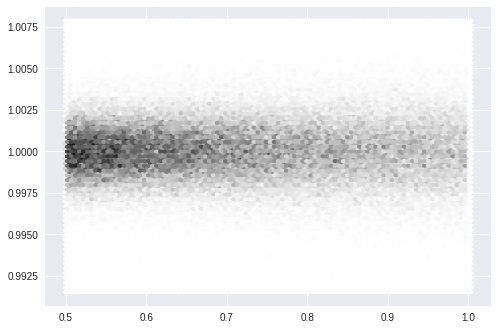

In [75]:
for i0 in range(2):
    print 'celltype', i0
    temp1 = np.asarray([obj.vb for obj in c[10**4:] if obj.celltype==i0])
    temp2 = np.asarray([obj.vd for obj in c[10**4:] if obj.celltype==i0])
    temp3 = np.asarray([obj.parent.vd for obj in c[10**4:] if obj.celltype==i0])
    temp4=temp1/temp3
    print np.mean(temp1), np.mean(temp2-temp1),  np.amin(temp4)
    plt.hexbin(temp1,temp2-temp1)
    plt.show()

In [85]:
td = [np.log(2), np.log(2)]
td_std = [0.1, 0.1]
# td = [1.0, 1.0]
# td_std = [0.1, 0.1]

# this script uses a simple adder model

par1 = {'nstep': 1000, 'dt':0.01, 'td': td, 'td_std': td_std, 'v_init':1.0, 'modeltype':4, 'delta':1.0, 
        'lambda_std':0.2, 'alpha':0.5, 'num_gen1':9, 'lambda':1.0, 'r':0.5}
init_pop = g.starting_popn(par1)
c = g.discr_gen_1(par1, init_pop)

celltype 0
1.35274338385 1.01190152574 0.666666666667


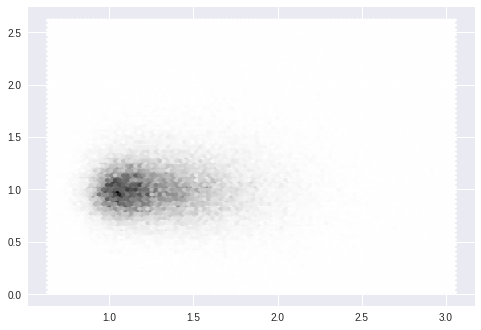

celltype 1
0.665658475318 1.00903859506 0.0251339848331


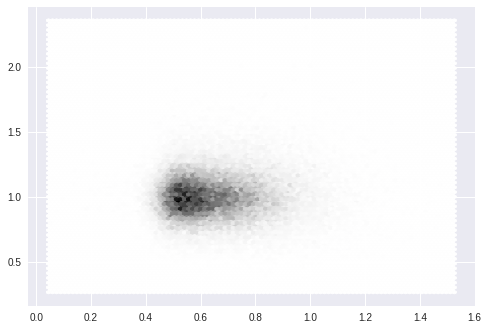

In [86]:
for i0 in range(2):
    print 'celltype', i0
    temp1 = np.asarray([obj.vb for obj in c[10**4:] if obj.celltype==i0])
    temp2 = np.asarray([obj.vd for obj in c[10**4:] if obj.celltype==i0])
    temp3 = np.asarray([obj.parent.vd for obj in c[10**4:] if obj.celltype==i0])
    temp4=temp1/temp3
    print np.mean(temp1), np.mean(temp2-temp1),  np.amin(temp4)
    plt.hexbin(temp1,temp2-temp1)
    plt.show()

In [65]:
print 2*par1['delta']/(1+par1['r']), 2*par1['r']*par1['delta']/(1+par1['r']), 

1.33333333333 0.666666666667


In [7]:
for i0 in range(3):
    print 'celltype', i0
    if i0 <2:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:] if obj.celltype==i0])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:] if obj.celltype==i0])
    else:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:]])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:]])
    print fn(par1)/(fn_1(par1, i0)**0.5*fn_1(par1, 2)**0.5)
    print scipy.stats.pearsonr(temp1, temp2)[0]
    print fn_1(par1, i0)**0.5, np.std(temp1)
    temp_val1 = scipy.stats.linregress(temp1, temp2)
    temp_val2 = scipy.stats.linregress(scipy.stats.zscore(temp1), scipy.stats.zscore(temp2))
    print temp_val1[2]*np.absolute(temp_val1[2]), temp_val2[2]*np.absolute(temp_val2[2]), 

celltype 0


NameError: name 'fn' is not defined

In [165]:
def fn(par1):  # <t_n+1 t_n>_c
    return (par1['alpha']*(1-par1['alpha'])*(np.log(par1['r'])/(2*par1['lambda']))**2-par1['alpha']*par1['td_std'][0]**2)/(2-par1['alpha'])
def fn_1(par1, celltype):  # sigma_t^2
    if celltype ==0 or celltype == 1:
        temp = par1['alpha']**2*(mom2_x(par1,2)-av_x(par1, 2)**2)*(1-2*par1['alpha'])/par1['lambda']**2+par1['alpha']**2*fn_1(par1,2)+par1['td_std'][0]**2
    elif celltype == 2:
        temp = (2*par1['td_std'][0]**2+par1['alpha']*(np.log(par1['r'])/(2*par1['lambda']))**2)/(2-par1['alpha'])
    return temp
def av_x(par1, celltype):
    b=par1['r']/(1+par1['r'])
    if celltype==0:
        temp = np.log(2*(1-b))+(1-par1['alpha'])*np.log(4*b*(1-b))/(2*par1['alpha'])
    if celltype == 1:
        temp = np.log(2*b)+(1-par1['alpha'])*np.log(4*b*(1-b))/(2*par1['alpha'])
    if celltype == 2:
        temp = np.log(4*b*(1-b))/(2*par1['alpha'])
    return temp
def mom2_x(par1, celltype):
    b=par1['r']/(1+par1['r'])
    if celltype==0:
        temp = np.log(2*(1-b))**2+2*(1-par1['alpha'])*np.log(2*(1-b))*av_x(par1, 2)+mom2_x(par1, 2)*(1-par1['alpha'])**2+(par1['lambda']*par1['td_std'][0])**2
    if celltype == 1:
        temp = np.log(2*(b))**2+2*(1-par1['alpha'])*np.log(2*(b))*av_x(par1, 2)+mom2_x(par1, 2)*(1-par1['alpha'])**2+(par1['lambda']*par1['td_std'][0])**2
    if celltype == 2:
        temp = ((par1['lambda']*par1['td_std'][0])**2+(np.log(par1['r'])/2)**2)/(par1['alpha']*(2-par1['alpha']))+av_x(par1, 2)**2
    return temp

In [185]:
for i0 in range(3):
    print 'celltype', i0
    if i0 <2:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:] if obj.celltype==i0])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:] if obj.celltype==i0])
    else:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:]])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:]])
    print fn(par1)/(fn_1(par1, i0)**0.5*fn_1(par1, 2)**0.5)
    print scipy.stats.pearsonr(temp1, temp2)[0]
    print fn_1(par1, i0)**0.5, np.std(temp1)

celltype 0
0.450141946968
0.401223563482
0.225462487641 0.205125305704
celltype 1
0.450141946968
0.467632413136
0.225462487641 0.24870577601
celltype 2
0.301470588235
0.292667591725
0.336650164612 0.339299590945


In [188]:
for i0 in range(3):
    print 'celltype', i0
    if i0 <2:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:] if obj.celltype==i0])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:] if obj.celltype==i0])
    else:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:]])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:]])
    print fn(par1)/(fn_1(par1, i0)**0.5*fn_1(par1, 2)**0.5)
    print scipy.stats.pearsonr(temp1, temp2)[0]
    print fn_1(par1, i0)**0.5, np.std(temp1)

celltype 0
0.450141946968
0.478719133407
0.225462487641 0.215222086519
celltype 1
0.450141946968
0.318242548903
0.225462487641 0.266668369884
celltype 2
0.301470588235
0.260862588707
0.336650164612 0.36014392371


In [193]:
for i0 in range(3):
    print 'celltype', i0
    if i0 <2:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:] if obj.celltype==i0])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:] if obj.celltype==i0])
    else:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:]])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:]])
    print fn(par1)/(fn_1(par1, i0)**0.5*fn_1(par1, 2)**0.5)
    print scipy.stats.pearsonr(temp1, temp2)[0]
    print fn_1(par1, i0)**0.5, np.std(temp1)

celltype 0
0.450141946968
0.441275647799
0.225462487641 0.224876751851
celltype 1
0.450141946968
0.440218563763
0.225462487641 0.224783976497
celltype 2
0.301470588235
0.295086153573
0.336650164612 0.335811611692


In [198]:
for i0 in range(3):
    print 'celltype', i0
    if i0 <2:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:] if obj.celltype==i0])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:] if obj.celltype==i0])
    else:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:]])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:]])
    print fn(par1)/(fn_1(par1, i0)**0.5*fn_1(par1, 2)**0.5)
    print scipy.stats.pearsonr(temp1, temp2)[0]
    print fn_1(par1, i0)**0.5, np.std(temp1)

celltype 0
0.450141946968
0.240993807778
0.225462487641 0.291178759186
celltype 1
0.450141946968
0.240621181102
0.225462487641 0.411212380905
celltype 2
0.301470588235
0.190990657577
0.336650164612 0.442740730993


In [201]:
for i0 in range(3):
    print 'celltype', i0
    if i0 <2:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:] if obj.celltype==i0])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:] if obj.celltype==i0])
    else:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:]])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:]])
    print fn(par1)/(fn_1(par1, i0)**0.5*fn_1(par1, 2)**0.5)
    print scipy.stats.pearsonr(temp1, temp2)[0]
    print fn_1(par1, i0)**0.5, np.std(temp1)

celltype 0
0.450141946968
0.297336684442
0.225462487641 0.298282714693
celltype 1
0.450141946968
0.153596463161
0.225462487641 0.436373844647
celltype 2
0.301470588235
0.166829643471
0.336650164612 0.466691258601


In [172]:
for i0 in range(3):
    print 'celltype', i0
    if i0 <2:
        temp1 = np.asarray([obj.t_grow for obj in c[2*10**4:] if obj.celltype==i0])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[2*10**4:] if obj.celltype==i0])
    else:
        temp1 = np.asarray([obj.t_grow for obj in c[2*10**4:]])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[2*10**4:]])
        print fn(par1)/fn_1(par1, 2)
    print np.mean(temp1*temp2)-np.mean(temp1)*np.mean(temp2)
    print np.std(temp1), np.std(temp2)
    print scipy.stats.pearsonr(temp1, temp2)[0]
    

celltype 0
0.0271781242553
0.206063302186 0.328499263127
0.401498960294
celltype 1
0.038000619671
0.24803954687 0.328499263127
0.466375094084
celltype 2
0.301470588235
0.0325893719632
0.339300282697 0.328499263127
0.292386535923


In [181]:
for i0 in range(3):
    print 'celltype', i0
    if i0 <2:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:] if obj.celltype==i0])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:] if obj.celltype==i0])
    else:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:]])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:]])
    print fn(par1)/(fn_1(par1, i0)**0.5*fn_1(par1, 2)**0.5)
    print scipy.stats.pearsonr(temp1, temp2)[0]
    print fn_1(par1, i0)**0.5, np.std(temp1)

celltype 0
0.450141946968
0.476534668024
0.225462487641 0.215053900204
celltype 1
0.450141946968
0.333215917974
0.225462487641 0.26215498252
celltype 2
0.301470588235
0.265291676075
0.336650164612 0.357785164807


In [158]:
for i0 in range(3):
    if i0 <2:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:] if obj.celltype==i0])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:] if obj.celltype==i0])
    else:
        temp1 = np.asarray([obj.t_grow for obj in c[10**4:]])
        temp2 = np.asarray([obj.parent.t_grow for obj in c[10**4:]])
    print 'celltype', i0
    print np.mean(temp1*temp2)-np.mean(temp1)*np.mean(temp2)
    print fn(par1)
    print scipy.stats.pearsonr(temp1, temp2)[0]
    print np.std(temp1), np.std(temp2)
    print (np.mean(temp1*temp2)-np.mean(temp1)*np.mean(temp2))/(np.std(temp2)*np.std(temp2))
    print fn(par1)/fn_1(par1)

celltype 0
0.0369995459834
0.0383333333333
0.65966269692
0.183075047031 0.306369349583
0.394190148028
0.396551724138
celltype 1
0.0368593681205
0.0383333333333
0.658251828089
0.182772350652 0.306369349583
0.392696704499
0.396551724138
celltype 2
0.036929457052
0.0383333333333
0.388669480984
0.310132419702 0.306369349583
0.393443426263
0.396551724138


In [11]:
td = [np.log(2), np.log(2)]
td_std = [0.15, 0.15]
# td = [1.0, 1.0]
# td_std = [0.1, 0.1]

# this script uses a simple adder model

par1 = {'nstep': 1000, 'dt':0.01, 'td': td, 'td_std': td_std, 'v_init':1.0, 'modeltype':1, 'delta':1.0, 
        'lambda_std':None}
# par1['lambda'] = scipy.optimize.fsolve(g.fn_1, x0=np.log(2.0) / np.mean(td), args=(par1['td'][0], par1['td'][1]))[0]
# temp = 0.5/(np.exp(par1['lambda']*par1['td'][1])-1)
# par1['r'] = temp/(1-temp)
par1['r']=0.5
par1['lambda']=1.0

In [12]:
init_pop = g.starting_popn(par1)
c,obs = g.discr_time_1(par1, init_pop)

In [13]:
temp2 = scipy.stats.linregress(obs[1][400:], np.log(obs[7][400:]))
print temp2[0]

0.999913401763


In [7]:
for i0 in range(2):
    print 'celltype =', i0
    temp1 = [obj.t_grow for obj in c[10**4:] if obj.celltype==i0]
    temp2 = [obj.parent.t_grow for obj in c[10**4:] if obj.celltype==i0]
    vals = scipy.stats.linregress(temp1, temp2)
    print vals[2]*np.absolute(vals[2]), 'parent child'
    if i0==1:
        temp3 = [obj.parent_current.t_grow for obj in c[10**4:] if obj.celltype == i0]
        vals = scipy.stats.linregress(temp1, temp3)
        print vals[2]*np.absolute(vals[2]), 'mother daughter same generation'
        vals = scipy.stats.linregress(temp2, temp3)
        print vals[2]*np.absolute(vals[2]), 'mother daughter diff generation'

celltype = 0
0.102713945227 parent child
celltype = 1
0.109175927417 parent child
0.134166006458 mother daughter same generation
0.102713945227 mother daughter diff generation


In [77]:
td = [1.858, 3.353]
# td_std = [0.4727, 0.9214]
# td = [1.0, 1.0]
td_std = [0.001, 0.001]

# this script uses a simple adder model


par1 = {'nstep': 1000, 'dt':0.01, 'td': td, 'td_std': td_std, 'v_init':1.0, 'modeltype':1, 'delta':1.0, 
        'lambda_std':0.2}

# defining r and lambda to approximate the same average division times for daughters and mothers.

par1['lambda'] = scipy.optimize.fsolve(g.fn_1, x0=np.log(2.0) / np.mean(td), args=(par1['td'][0], par1['td'][1]))[0]
temp = 0.5/(np.exp(par1['lambda']*par1['td'][1])-1)
par1['r'] = temp/(1-temp)
# par1['r'] = 0.6
# par1['lambda'] = 1.0

In [78]:
init_pop = g.starting_popn(par1)
c,obs = g.discr_time_1(par1, init_pop)

In [79]:
temp2 = scipy.stats.linregress(obs[1][400:], np.log(obs[7][400:]))
print temp2[0]/par1['lambda']
temp2 = scipy.stats.linregress(obs[1][400:], np.log(obs[4][400:]))
print temp2[0]/par1['lambda']

0.972047886052
0.972370898401


In [22]:
temp2 = scipy.stats.linregress(obs[1][400:], np.log(obs[7][400:]))
print temp2[0]/par1['lambda']

0.903258027613


In [76]:
for i0 in range(2):
    print 'celltype =', i0
    temp1 = [obj.t_grow for obj in c[10**4:] if obj.celltype==i0]
    print np.mean(temp1)
    temp2 = [obj.parent.t_grow for obj in c[10**4:] if obj.celltype==i0]
    vals = scipy.stats.linregress(temp1, temp2)
    print vals[2]*np.absolute(vals[2]), 'parent child', scipy.stats.pearsonr(temp1, temp2)[0]
    if i0==1:
        temp3 = [obj.parent_current.t_grow for obj in c[10**4:] if obj.celltype == i0]
        vals = scipy.stats.linregress(temp1, temp3)
        print vals[2]*np.absolute(vals[2]), 'mother daughter same generation', scipy.stats.pearsonr(temp1, temp3)[0]
        vals = scipy.stats.linregress(temp2, temp3)
        print vals[2]*np.absolute(vals[2]), 'mother daughter diff generation', scipy.stats.pearsonr(temp2, temp3)[0]

celltype = 0
1.9357189171
0.0100091144743 parent child 0.100045561992
celltype = 1
3.46974048927
0.00776618564654 parent child 0.088125964656
0.117158704376 mother daughter same generation 0.342284537156
0.0100091144743 mother daughter diff generation 0.100045561992
